# In this section we  
 - <font size="5">define the necessary imports for the project</font>
 - <font size="5">import the data into our notebook</font>
 - <font size="5">take a look at the variables present in the dataset</font>

In [1]:
# Import numpy pandas
# Also stats package
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm

# Feature engineering requirement
from sklearn.preprocessing import StandardScaler

# Data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Other imports
import warnings
warnings.filterwarnings('ignore')

#Show plots within notebook
%matplotlib inline

# Import the dataset and show the list of columns in it.
df_train=pd.read_csv("inputs/train.csv")
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<font size=5> __In this section we analyse the target variable 'SalePrice'__</font>

<font size=5>A plot of 'SalePrice' reveals the following:</font>
 - It deviates from the normal distribution
 - It is skewed towards the right (more values towards tail, positive skewness)
 - It shows a prominent peak (kurtosis)

In [2]:
# Describe the statistical properties of SalePrice (target) variable
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


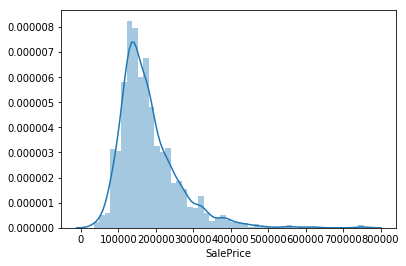

In [3]:
# Plot a histogram of SalePrice
sns.distplot(df_train['SalePrice']);

#skewness and kurtosis describe the histogram
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

## Investigation of the relationship between target variable & chosen independent variables.
 - The first plot shows relationship between continuous variables & target variable
     - Plot of SalePrice vs GrLivArea shows marked heteroscedasticity,i.e. the target variable shows unequal levels of variance across different predictor (independent) variables. This is usually identified by a funnel-shaped scatter plot.
  
  
 - The second plot shows relationship between categorical variables & target variable

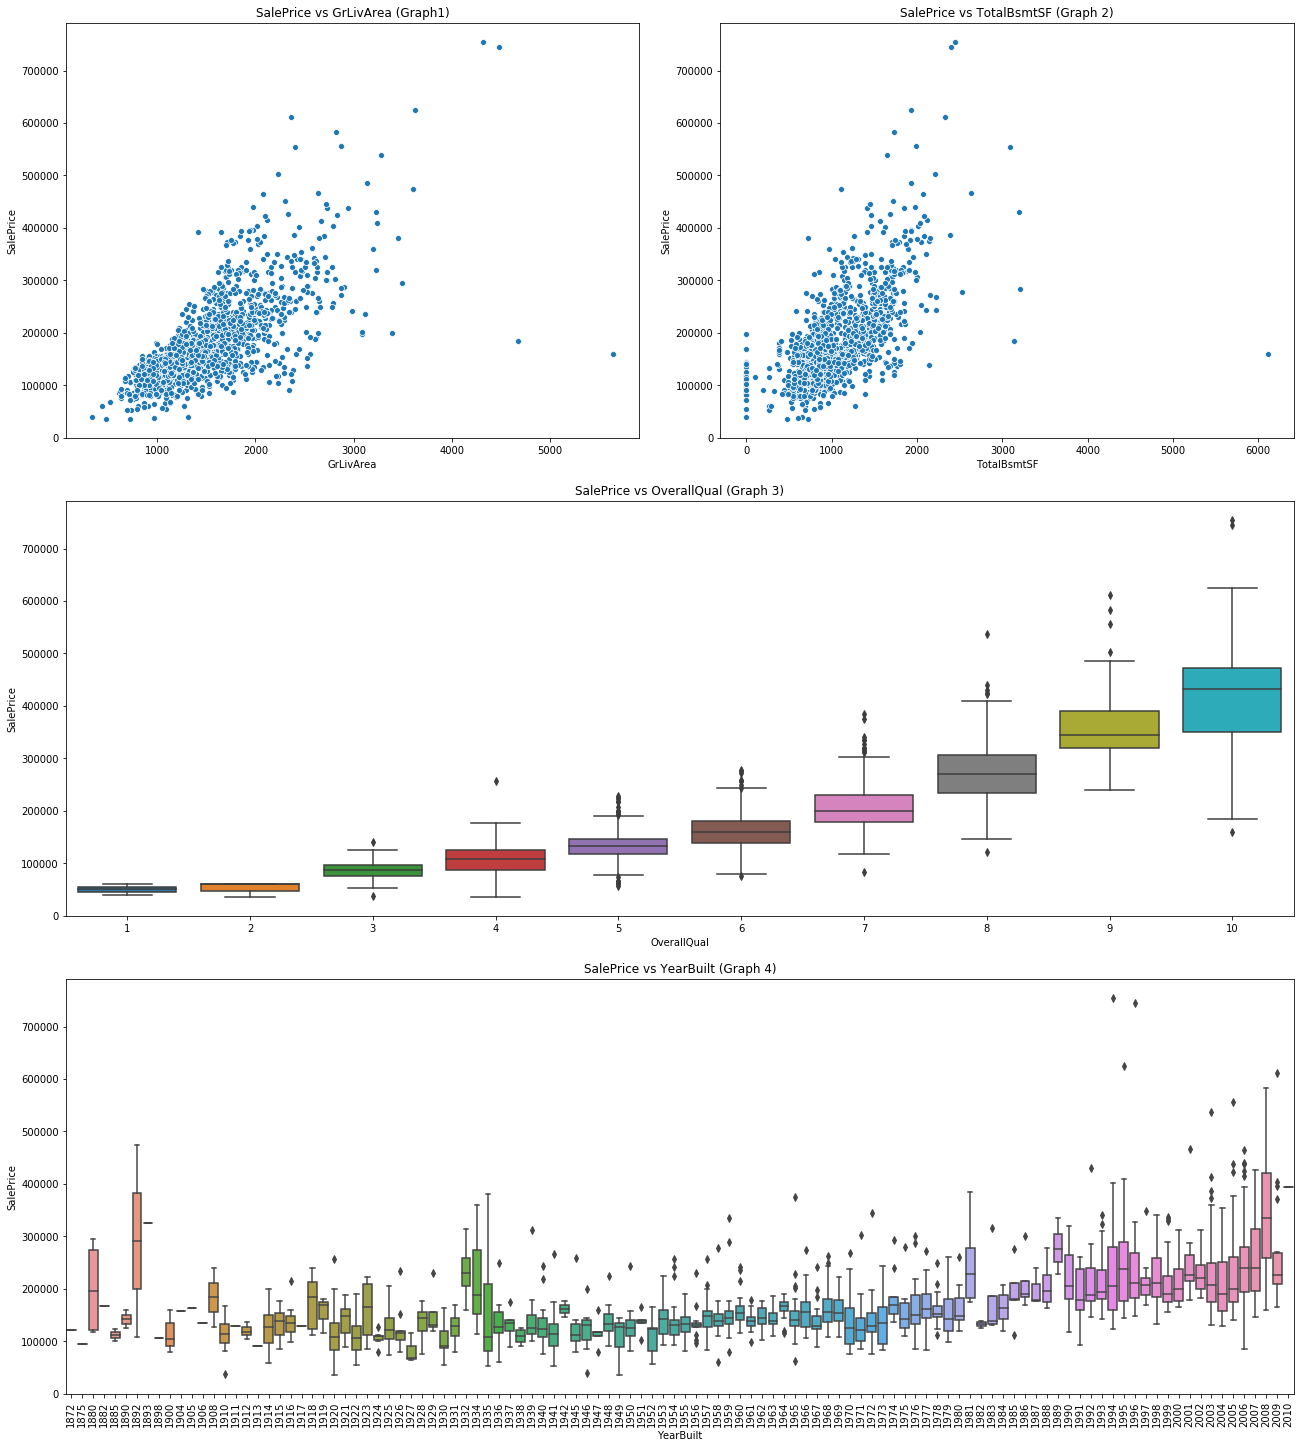

In [47]:
# Scatter plot of SalePrice vs GrLivArea
# var='GrLivArea'
# data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
# data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
figure = plt.figure(constrained_layout=True,figsize=(18,20))
grid = figure.add_gridspec(3,2)

# Continuous variables vs target variable
graph1=figure.add_subplot(grid[0,:1])
graph1.set_title('SalePrice vs GrLivArea (Graph1)')
sns.scatterplot(df_train.GrLivArea,df_train.SalePrice,ax=graph1)

graph2=figure.add_subplot(grid[0,1:])
graph2.set_title('SalePrice vs TotalBsmtSF (Graph 2)')
sns.scatterplot(df_train.TotalBsmtSF,df_train.SalePrice,ax=graph2)

# Categorical variables vs target variable
graph3=figure.add_subplot(grid[1,:])
graph3.set_title('SalePrice vs OverallQual (Graph 3)')
sns.boxplot(df_train.OverallQual,df_train.SalePrice,ax = graph3);

graph4=figure.add_subplot(grid[2,:])
graph4.set_title('SalePrice vs YearBuilt (Graph 4)')
boxplot=sns.boxplot(df_train.YearBuilt,df_train.SalePrice,ax = graph4);
_= boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation=90)
#type(boxplot)